In [1]:
#import the usefull libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#load a data set
df=pd.read_csv("E:\IBM\SampleSuperstore.csv\SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.drop(columns="Postal Code",inplace=True)

In [4]:
#undestanding the data
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
print(df["Ship Mode"].unique(),end="true")

print(df["Segment"].unique())

print(df["Country"].unique())

print(df["Category"].unique())

print(df["Sub-Category"].unique())
print(df["Region"].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']true['Consumer' 'Corporate' 'Home Office']
['United States']
['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
['South' 'West' 'Central' 'East']


In [6]:
#stastical
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


In [7]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

<AxesSubplot:xlabel='Region'>

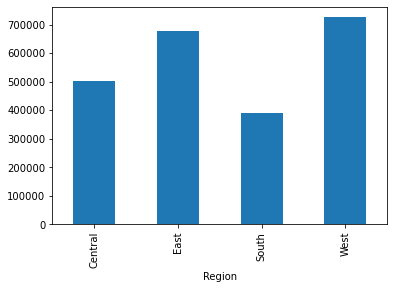

In [8]:
df.groupby("Region")["Sales"].sum().plot.bar()

<AxesSubplot:xlabel='Region'>

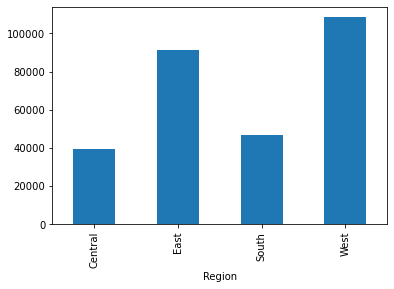

In [9]:
df.groupby("Region")["Profit"].sum().plot.bar()

<AxesSubplot:ylabel='Sales'>

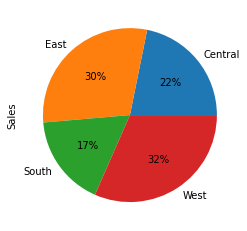

In [10]:
df.groupby("Region")["Sales"].sum().plot.pie(autopct="%1.0f%%")


<AxesSubplot:ylabel='Profit'>

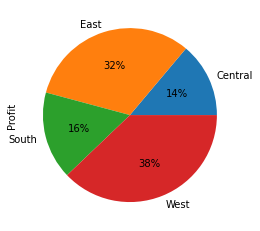

In [11]:
df.groupby("Region")["Profit"].sum().plot.pie(autopct="%1.0f%%")

<AxesSubplot:xlabel='Segment'>

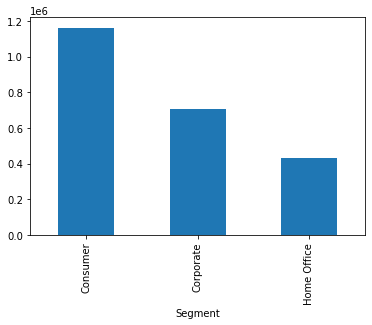

In [12]:
df.groupby("Segment")["Sales"].sum().plot.bar()

<AxesSubplot:xlabel='Segment'>

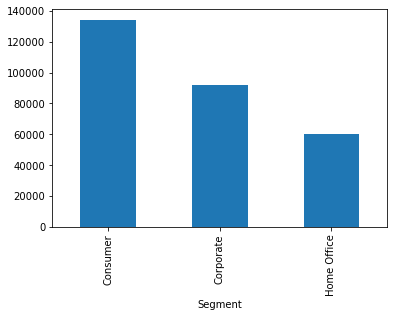

In [13]:
df.groupby("Segment")["Profit"].sum().plot.bar()

<AxesSubplot:xlabel='Category'>

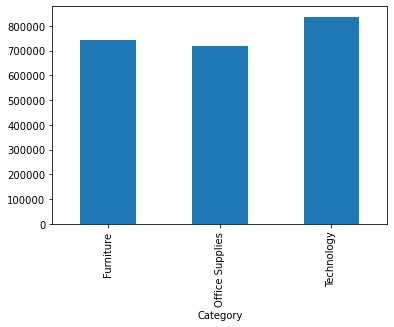

In [14]:
df.groupby("Category")["Sales"].sum().plot.bar()

<AxesSubplot:xlabel='Category'>

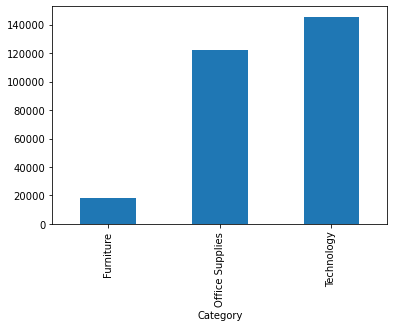

In [15]:
df.groupby("Category")["Profit"].sum().plot.bar()

<AxesSubplot:>

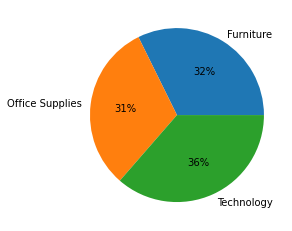

In [16]:
df.groupby("Category")["Sales"].sum().plot.pie(ylabel="",autopct="%1.0f%%")

<AxesSubplot:ylabel='Profit'>

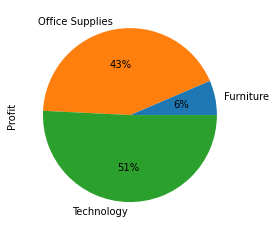

In [17]:
df.groupby("Category")["Profit"].sum().plot.pie(autopct="%1.0f%%")

<AxesSubplot:xlabel='State'>

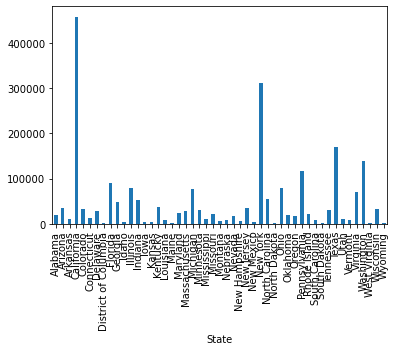

In [18]:
df.groupby("State")["Sales"].sum().plot.bar()

<AxesSubplot:xlabel='State'>

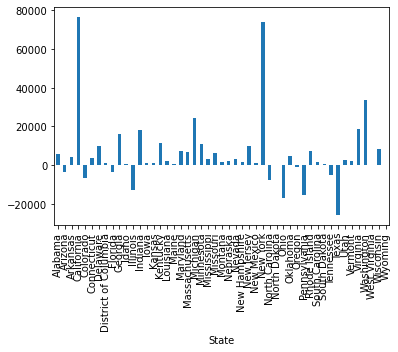

In [19]:
df.groupby("State")["Profit"].sum().plot.bar()

<AxesSubplot:xlabel='State'>

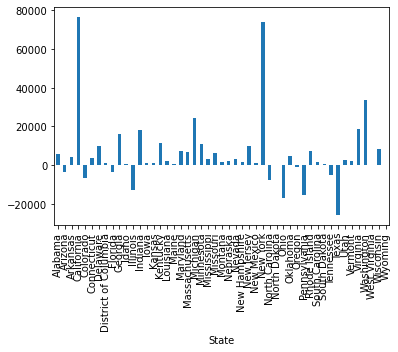

In [20]:
df.groupby("State")["Profit"].sum().plot.bar()

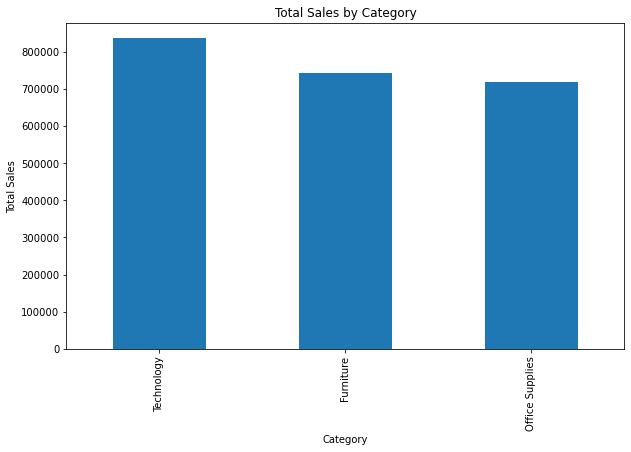

In [24]:
sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
sales_by_category.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Total Sales by Category')
plt.show()


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
data = pd.read_csv("E:\IBM\SampleSuperstore.csv\SampleSuperstore.csv")
X = data[[ 'Quantity', 'Discount', 'Profit']]  
y = data['Sales'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Mean Squared Error: 680377.4563719595
Model Coefficients: [ 41.55026357 249.57178023   1.56167367]
Model Intercept: -18.097131357548335
